In [228]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [229]:
def parser(x):
 return datetime.strptime('200'+x, '%Y-%m')

# series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
df = pd.read_csv('shampoo.csv', index_col=0, parse_dates=[0], date_parser=parser)

df.head()

/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_17492/2643970397.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('shampoo.csv', index_col=0, parse_dates=[0], date_parser=parser)


,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


<Axes: xlabel='Month'>

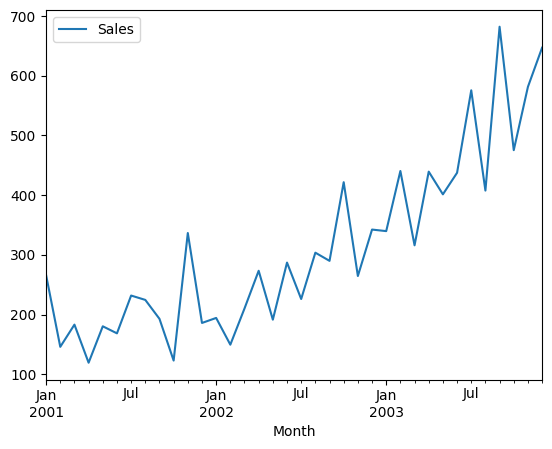

In [230]:
df.plot()

In [231]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Sales'])

(3.0601420836411797,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.99726442630316)

In [232]:
df['first_difference'] = df['Sales'].diff(1)
df.head()

,Sales,first_difference
Month,,
2001-01-01,266.0,NaN
2001-02-01,145.9,-120.1
2001-03-01,183.1,37.2
2001-04-01,119.3,-63.8
2001-05-01,180.3,61.0


In [233]:
adfuller(df['first_difference'].dropna())

(-7.249074055553854,
 1.7998574141687034e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

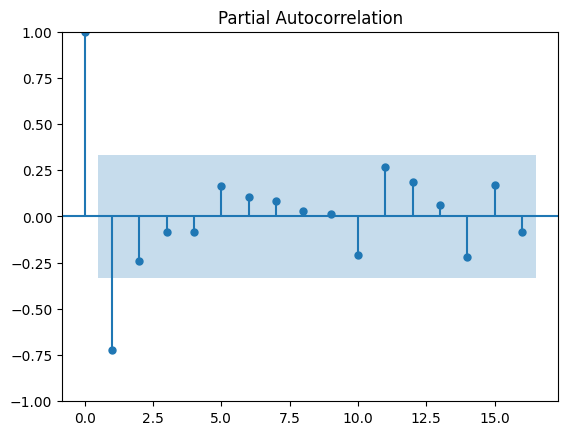

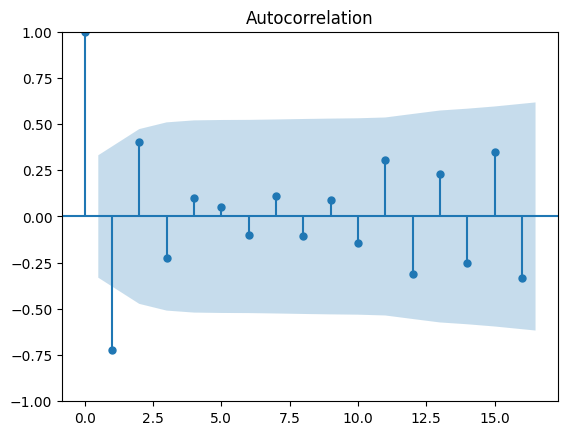

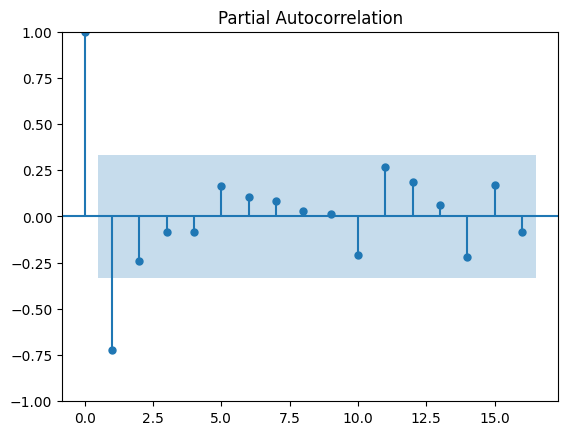

In [234]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['first_difference'].dropna())
plot_pacf(df['first_difference'].dropna())


In [235]:
train = df[:round(len(df)*0.66)]
test = df[round(len(df)*0.66):]

test.head()

,Sales,first_difference
Month,,
2003-01-01,339.7,-2.6
2003-02-01,440.4,100.7
2003-03-01,315.9,-124.5
2003-04-01,439.3,123.4
2003-05-01,401.3,-38.0


In [236]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['first_difference'].dropna(), order=(5,1,1))
model_fit = model.fit()
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
df['prediction'] = pred

/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/SAGOR/Unknown/CSM_Lab/csm_venv/l

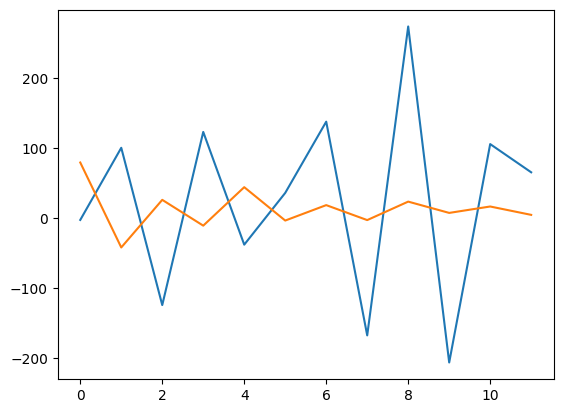

In [237]:
plt.plot(test['first_difference'].values)
plt.plot(pred.values)

In [238]:
df['predSales'] = df['Sales'].shift(1) + df['prediction']
df.tail()

,Sales,first_difference,prediction,predSales
Month,,,,
2003-08-01,407.6,-167.9,18.606019,594.106019
2003-09-01,682.0,274.4,-2.818114,404.781886
2003-10-01,475.3,-206.7,23.626791,705.626791
2003-11-01,581.3,106.0,7.458940,482.758940
2003-12-01,646.9,65.6,16.636926,597.936926


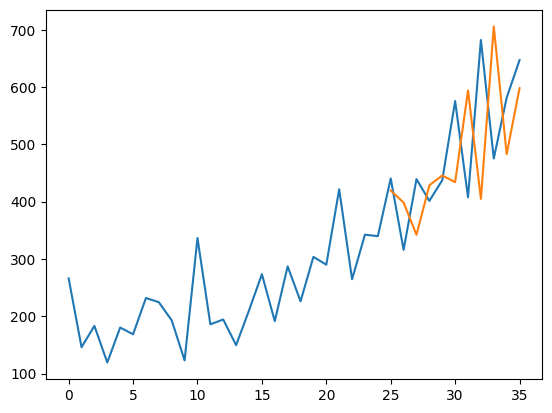

In [239]:
plt.plot(df['Sales'].values)
plt.plot(df['predSales'].values)

In [240]:
# df.tail()

futureDate = pd.DataFrame(pd.date_range(start='2004-01-01', end='2004-12-01', freq='MS'), columns=['Month'])
futureDate.set_index('Month', inplace=True)

futureDate

""
Month
2004-01-01
2004-02-01
2004-03-01
2004-04-01
2004-05-01
2004-06-01
2004-07-01
2004-08-01
2004-09-01


In [241]:
futurePred = np.array(model_fit.predict(start=len(df), end=len(df)+11))
# futurePred = model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1], typ='levels')
futurePred = pd.DataFrame(futurePred, columns=['prediction'], index=futureDate.index)
futurePred

,prediction
Month,
2004-01-01,15.266015
2004-02-01,9.805773
2004-03-01,14.699781
2004-04-01,8.956833
2004-05-01,12.718340
2004-06-01,10.483925
2004-07-01,13.112440
2004-08-01,10.754896
2004-09-01,12.077961


In [242]:
# df = pd.concat([df, futurePred])
df

,Sales,first_difference,prediction,predSales
Month,,,,
2001-01-01,266.0,NaN,NaN,NaN
2001-02-01,145.9,-120.1,NaN,NaN
2001-03-01,183.1,37.2,NaN,NaN
2001-04-01,119.3,-63.8,NaN,NaN
2001-05-01,180.3,61.0,NaN,NaN
2001-06-01,168.5,-11.8,NaN,NaN
2001-07-01,231.8,63.3,NaN,NaN
2001-08-01,224.5,-7.3,NaN,NaN
2001-09-01,192.8,-31.7,NaN,NaN


In [243]:
for i in range(0, len(futurePred)):
    temp = df['predSales'][-1] + futurePred['prediction'][i]
    df.loc[futurePred.index[i]] = futurePred.iloc[i]
    df['predSales'][-1] = temp

df.tail(13)

/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_17492/1051874313.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = df['predSales'][-1] + futurePred['prediction'][i]
/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_17492/1051874313.py:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df['predSales'][-1] = temp
/var/folders/hg/69dt6nq563b9pt0myh8sprb40000gn/T/ipykernel_17492/1051874313.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

,Sales,first_difference,prediction,predSales
Month,,,,
2003-12-01,646.9,65.6,16.636926,597.936926
2004-01-01,NaN,NaN,15.266015,613.202941
2004-02-01,NaN,NaN,9.805773,623.008714
2004-03-01,NaN,NaN,14.699781,637.708495
2004-04-01,NaN,NaN,8.956833,646.665328
2004-05-01,NaN,NaN,12.718340,659.383668
2004-06-01,NaN,NaN,10.483925,669.867593
2004-07-01,NaN,NaN,13.112440,682.980033
2004-08-01,NaN,NaN,10.754896,693.734929


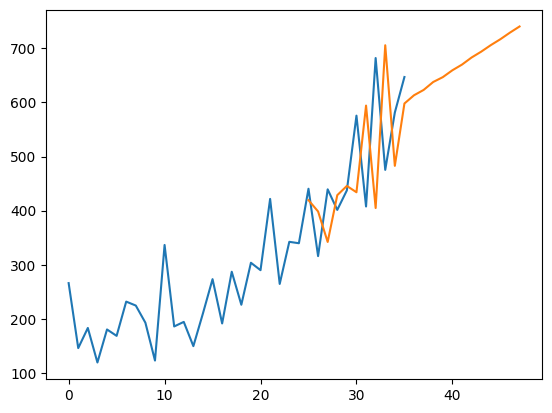

In [244]:
plt.plot(df['Sales'].values)
plt.plot(df['predSales'].values)